## 2022 Predict Ideology Score for NHL Teams

In [1]:
from fastai.text.all import *
import transformers
from ideology_utils import *

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
transformers.utils.logging.set_verbosity(40) 

### Download Unlimited Tweets using Unofficial Twitter API

Twitter handles for a selected **NBA Teams** were copied and pasted into a csv `handles_group.csv` file manually from here: https://www.4icu.org/twitter/us/

Used `node index.js handles_group.csv 500`
This should be done in mamba environment containing `npm` and `nodejs`. The program itself is `index.js`. All of this is located in `twitterAPI` and is available from github: https://github.com/colindaniels/twitterAPI

To load these tweeets, reference the directory that then contains `json` files for each member of the group.

In [3]:
group = Path('tweets/tweets-nhl-2022-500')

### Download Tweets using Official Twitter API (faster, but limited to past week and subject to rate limits) 

In [4]:
#group = get_tweets_of_group("handles/handles_nfl.csv", "tweets-nfl")

### Ideology of a Select Group using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

In [4]:
trainer,tokz = load_tfms_model()

In [5]:
scores_tfms = scores_of_group_tfms(group, [trainer,tokz])

['NHLFlyers', 0.28, 0.31, 500]
['Canucks', 0.59, 0.58, 500]
['Avalanche', 0.24, 0.28, 500]
['TBLightning', 0.46, 0.48, 500]
['NHLJets', 0.3, 0.36, 499]
['mnwild', 0.71, 0.71, 500]
['NHLFlames', 0.5, 0.5, 500]
['Senators', 0.41, 0.42, 499]
['Capitals', 0.56, 0.56, 499]
['BlueJacketsNHL', 0.45, 0.48, 500]
['NHLBruins', 0.47, 0.49, 500]
['CanadiensMTL', 0.34, 0.37, 500]
['penguins', 0.45, 0.47, 500]
['BuffaloSabres', 0.24, 0.29, 500]
['ArizonaCoyotes', 0.42, 0.45, 500]
['LAKings', 0.45, 0.46, 499]
['FlaPanthers', 0.66, 0.63, 500]
['AnaheimDucks', 0.63, 0.63, 500]
['NYRangers', 0.34, 0.39, 500]
['EdmontonOilers', 0.49, 0.5, 500]
['DallasStars', 0.58, 0.57, 500]
['GoldenKnights', 0.49, 0.52, 500]
['PredsNHL', 0.55, 0.54, 500]
['NJDevils', 0.41, 0.41, 500]
['DetroitRedWings', 0.58, 0.56, 500]
['MapleLeafs', 0.35, 0.36, 500]
['NHLBlackhawks', 0.42, 0.45, 500]
['StLouisBlues', 0.63, 0.61, 500]
['NYIslanders', 0.51, 0.51, 500]
['SanJoseSharks', 0.4, 0.45, 498]


In [7]:
df = scores2df(scores_tfms,'s1')

### Ideology of NHL Teams using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.
**0 is Progressive, 1 is Conservative**

<AxesSubplot:ylabel='handle'>

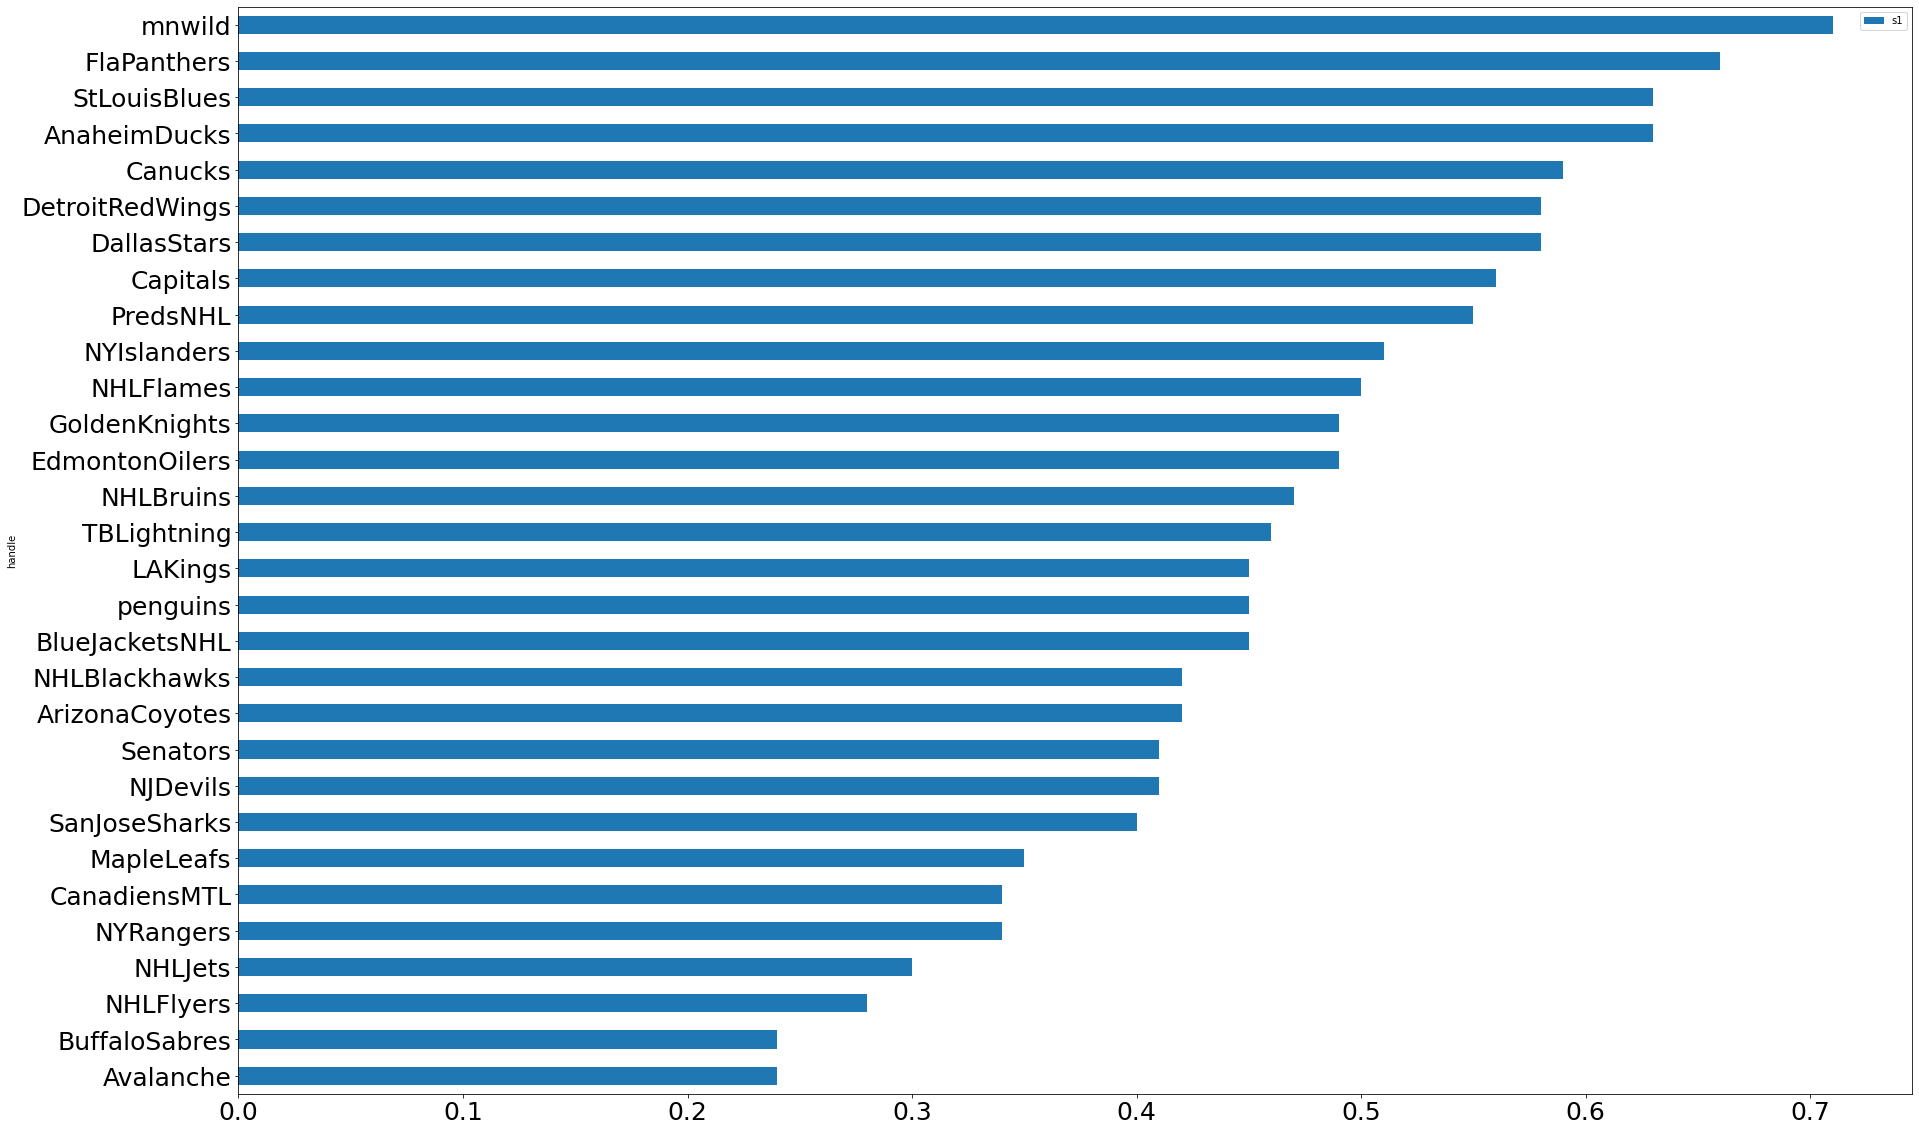

In [8]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)